# Importing the relevant Libraries and Connecting to google drive

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import cv2
import os
from sklearn.model_selection import train_test_split
from PIL import Image
import random
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from keras.callbacks import ReduceLROnPlateau
import pickle
from keras import backend as K

import tensorflow as tf
import keras
from keras.models import *
from keras.layers import *
from keras.preprocessing.image import ImageDataGenerator, img_to_array
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/plantdetection/PlantVillage"
print (path)

/content/drive/MyDrive/plantdetection/PlantVillage


# Converting Images to Arrays and resizing them

In [ ]:
def image_to_array(directory):
  img = cv2.imread(directory)
  if img is not None:
    img = cv2.resize(img, (256,256))
    return img_to_array(img)
  else:
    return np.array([])

In [ ]:
img_list = []
img_label_list = []

try:
    list_of_dir = os.listdir(path)
    for direct in list_of_dir:
      image_file = os.listdir(path + "/" + direct)

      for imgs in image_file[:400]:
        img_path = (path + '/' + direct + '/' + imgs)
        if img_path.endswith('jpg') == True or img_path.endswith('JPG') == True:
          img_list.append(image_to_array(img_path))
          img_label_list.append(direct)

except Exception as e:
    print('error' + e)

# Converting images to Binary

In [ ]:
lb = LabelBinarizer()
img_label_list_binary = lb.fit_transform(img_label_list)
pickle.dump(lb,open('label_transform.pkl', 'wb'))

# Normalizing the Data

In [ ]:
img_list_array = np.array(img_list, dtype=np.float16) / 255.0

# Splitting the Dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(img_list_array, img_label_list_binary, test_size=0.20, random_state=42)

# Implentation of LeNet-5 Model

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPool2D(strides=2))
model.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(MaxPool2D(strides=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(15, activation='softmax'))

model.build()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 256, 256, 32)      2432      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 128, 128, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 124, 124, 48)      38448     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 62, 62, 48)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 184512)            0         
                                                                 
 dense_3 (Dense)             (None, 256)              

In [ ]:
adam = Adam(lr=5e-4)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)

## Data augmentation and fitting the model

In [ ]:
datagen = ImageDataGenerator(
            rotation_range=10,
            width_shift_range=0.1,
            height_shift_range=0.1,
            zoom_range=0.1)
datagen.fit(X_train)

In [ ]:
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=100),steps_per_epoch=len(X_train)/100,
                    epochs=30, validation_data=(X_test, y_test), callbacks=[reduce_lr])

<ipython-input-40-6b632c64b862>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=100),steps_per_epoch=len(X_train)/100,


Epoch 1/30
46/45 [==============================] - ETA: 0s - loss: 2.8205 - accuracy: 0.1779

45/45 [==============================] - 61s 1s/step - loss: 2.8205 - accuracy: 0.1779 - val_loss: 2.2521 - val_accuracy: 0.2690 - lr: 0.0010
Epoch 2/30
46/45 [==============================] - ETA: 0s - loss: 1.7068 - accuracy: 0.4478

45/45 [==============================] - 58s 1s/step - loss: 1.7068 - accuracy: 0.4478 - val_loss: 1.4295 - val_accuracy: 0.5118 - lr: 0.0010
Epoch 3/30
46/45 [==============================] - ETA: 0s - loss: 1.3088 - accuracy: 0.5699

45/45 [==============================] - 57s 1s/step - loss: 1.3088 - accuracy: 0.5699 - val_loss: 1.6560 - val_accuracy: 0.5004 - lr: 0.0010
Epoch 4/30
46/45 [==============================] - ETA: 0s - loss: 1.0416 - accuracy: 0.6587

45/45 [==============================] - 57s 1s/step - loss: 1.0416 - accuracy: 0.6587 - val_loss: 1.2179 - val_accuracy: 0.6044 - lr: 0.0010
Epoch 5/30
46/45 [==============================] - ETA: 0s - loss: 0.8764 - accuracy: 0.7098

45/45 [==============================] - 57s 1s/step - loss: 0.8764 - accuracy: 0.7098 - val_loss: 0.7535 - val_accuracy: 0.7476 - lr: 0.0010
Epoch 6/30
46/45 [==============================] - ETA: 0s - loss: 0.7871 - accuracy: 0.7417

45/45 [==============================] - 57s 1s/step - loss: 0.7871 - accuracy: 0.7417 - val_loss: 0.8831 - val_accuracy: 0.7100 - lr: 0.0010
Epoch 7/30
46/45 [==============================] - ETA: 0s - loss: 0.7120 - accuracy: 0.7618

45/45 [==============================] - 57s 1s/step - loss: 0.7120 - accuracy: 0.7618 - val_loss: 0.7592 - val_accuracy: 0.7389 - lr: 0.0010
Epoch 8/30
46/45 [==============================] - ETA: 0s - loss: 0.5890 - accuracy: 0.8002

45/45 [==============================] - 57s 1s/step - loss: 0.5890 - accuracy: 0.8002 - val_loss: 1.1294 - val_accuracy: 0.6480 - lr: 0.0010
Epoch 9/30
46/45 [==============================] - ETA: 0s - loss: 0.6497 - accuracy: 0.7893

45/45 [==============================] - 57s 1s/step - loss: 0.6497 - accuracy: 0.7893 - val_loss: 0.7733 - val_accuracy: 0.7389 - lr: 0.0010
Epoch 10/30
46/45 [==============================] - ETA: 0s - loss: 0.5579 - accuracy: 0.8120

45/45 [==============================] - 57s 1s/step - loss: 0.5579 - accuracy: 0.8120 - val_loss: 0.5331 - val_accuracy: 0.8245 - lr: 0.0010
Epoch 11/30
46/45 [==============================] - ETA: 0s - loss: 0.5337 - accuracy: 0.8109

45/45 [==============================] - 56s 1s/step - loss: 0.5337 - accuracy: 0.8109 - val_loss: 0.6065 - val_accuracy: 0.8061 - lr: 0.0010
Epoch 12/30
46/45 [==============================] - ETA: 0s - loss: 0.4818 - accuracy: 0.8380

45/45 [==============================] - 57s 1s/step - loss: 0.4818 - accuracy: 0.8380 - val_loss: 0.8046 - val_accuracy: 0.7467 - lr: 0.0010
Epoch 13/30
46/45 [==============================] - ETA: 0s - loss: 0.4056 - accuracy: 0.8655

45/45 [==============================] - 57s 1s/step - loss: 0.4056 - accuracy: 0.8655 - val_loss: 0.6832 - val_accuracy: 0.7948 - lr: 0.0010
Epoch 14/30
46/45 [==============================] - ETA: 0s - loss: 0.4111 - accuracy: 0.8559

45/45 [==============================] - 57s 1s/step - loss: 0.4111 - accuracy: 0.8559 - val_loss: 0.8847 - val_accuracy: 0.7345 - lr: 0.0010
Epoch 15/30
46/45 [==============================] - ETA: 0s - loss: 0.3661 - accuracy: 0.8771

45/45 [==============================] - 58s 1s/step - loss: 0.3661 - accuracy: 0.8771 - val_loss: 2.0259 - val_accuracy: 0.6070 - lr: 0.0010
Epoch 16/30
46/45 [==============================] - ETA: 0s - loss: 0.4285 - accuracy: 0.8605

45/45 [==============================] - 57s 1s/step - loss: 0.4285 - accuracy: 0.8605 - val_loss: 1.0611 - val_accuracy: 0.7354 - lr: 0.0010
Epoch 17/30
46/45 [==============================] - ETA: 0s - loss: 0.3441 - accuracy: 0.8843

45/45 [==============================] - 57s 1s/step - loss: 0.3441 - accuracy: 0.8843 - val_loss: 0.4272 - val_accuracy: 0.8664 - lr: 0.0010
Epoch 18/30
46/45 [==============================] - ETA: 0s - loss: 0.3220 - accuracy: 0.8871

45/45 [==============================] - 57s 1s/step - loss: 0.3220 - accuracy: 0.8871 - val_loss: 0.4614 - val_accuracy: 0.8533 - lr: 0.0010
Epoch 19/30
46/45 [==============================] - ETA: 0s - loss: 0.3310 - accuracy: 0.8801

45/45 [==============================] - 57s 1s/step - loss: 0.3310 - accuracy: 0.8801 - val_loss: 1.0191 - val_accuracy: 0.7135 - lr: 0.0010
Epoch 20/30
46/45 [==============================] - ETA: 0s - loss: 0.3542 - accuracy: 0.8801

45/45 [==============================] - 57s 1s/step - loss: 0.3542 - accuracy: 0.8801 - val_loss: 0.7342 - val_accuracy: 0.7843 - lr: 0.0010
Epoch 21/30
46/45 [==============================] - ETA: 0s - loss: 0.2932 - accuracy: 0.8976

45/45 [==============================] - 57s 1s/step - loss: 0.2932 - accuracy: 0.8976 - val_loss: 0.9929 - val_accuracy: 0.7485 - lr: 0.0010
Epoch 22/30
46/45 [==============================] - ETA: 0s - loss: 0.2575 - accuracy: 0.9124

45/45 [==============================] - 57s 1s/step - loss: 0.2575 - accuracy: 0.9124 - val_loss: 0.6720 - val_accuracy: 0.8105 - lr: 0.0010
Epoch 23/30
46/45 [==============================] - ETA: 0s - loss: 0.2562 - accuracy: 0.9127

45/45 [==============================] - 57s 1s/step - loss: 0.2562 - accuracy: 0.9127 - val_loss: 0.5414 - val_accuracy: 0.8437 - lr: 0.0010
Epoch 24/30
46/45 [==============================] - ETA: 0s - loss: 0.2873 - accuracy: 0.9061

45/45 [==============================] - 57s 1s/step - loss: 0.2873 - accuracy: 0.9061 - val_loss: 0.6037 - val_accuracy: 0.8087 - lr: 0.0010
Epoch 25/30
46/45 [==============================] - ETA: 0s - loss: 0.3097 - accuracy: 0.8967

45/45 [==============================] - 57s 1s/step - loss: 0.3097 - accuracy: 0.8967 - val_loss: 0.6941 - val_accuracy: 0.8122 - lr: 0.0010
Epoch 26/30
46/45 [==============================] - ETA: 0s - loss: 0.2239 - accuracy: 0.9205

45/45 [==============================] - 57s 1s/step - loss: 0.2239 - accuracy: 0.9205 - val_loss: 0.5149 - val_accuracy: 0.8550 - lr: 0.0010
Epoch 27/30
46/45 [==============================] - ETA: 0s - loss: 0.2375 - accuracy: 0.9190

45/45 [==============================] - 57s 1s/step - loss: 0.2375 - accuracy: 0.9190 - val_loss: 0.4058 - val_accuracy: 0.8751 - lr: 0.0010
Epoch 28/30
46/45 [==============================] - ETA: 0s - loss: 0.1967 - accuracy: 0.9314

45/45 [==============================] - 57s 1s/step - loss: 0.1967 - accuracy: 0.9314 - val_loss: 0.4217 - val_accuracy: 0.8821 - lr: 0.0010
Epoch 29/30
46/45 [==============================] - ETA: 0s - loss: 0.2200 - accuracy: 0.9236

45/45 [==============================] - 57s 1s/step - loss: 0.2200 - accuracy: 0.9236 - val_loss: 0.6545 - val_accuracy: 0.8358 - lr: 0.0010
Epoch 30/30
46/45 [==============================] - ETA: 0s - loss: 0.1821 - accuracy: 0.9391

45/45 [==============================] - 57s 1s/step - loss: 0.1821 - accuracy: 0.9391 - val_loss: 0.6613 - val_accuracy: 0.8306 - lr: 0.0010


# Evaluating the Models performance and viewing predictions on Unseen Data

In [ ]:
scores = model.evaluate(X_test, y_test)
print("Test accuracy: ", scores[1])

36/36 [==============================] - 1s 14ms/step - loss: 0.6613 - accuracy: 0.8306
Test accuracy:  0.8305676579475403


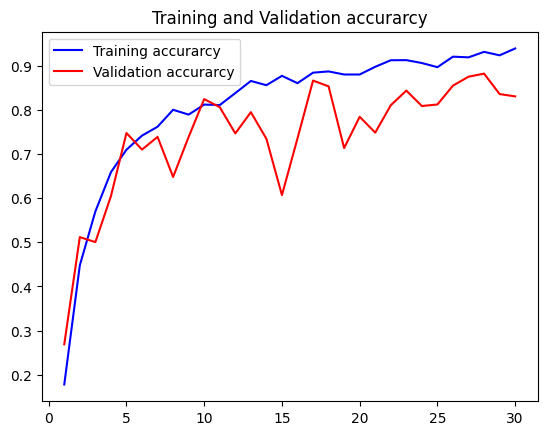

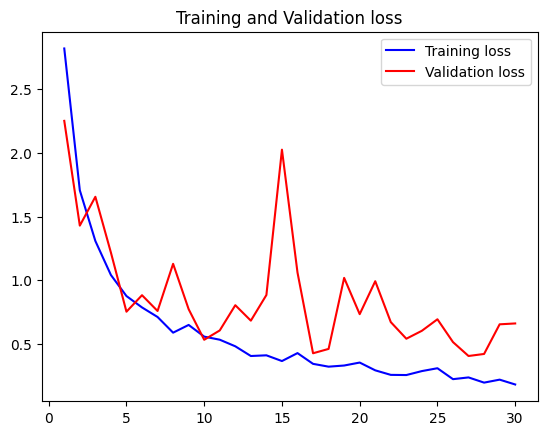

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

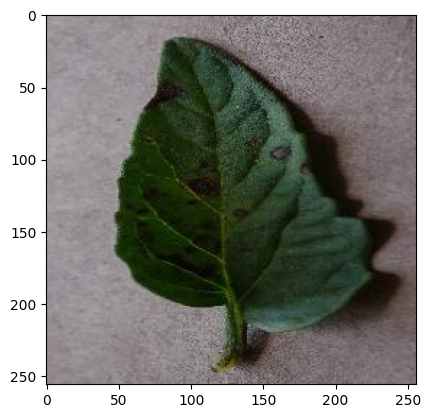

In [ ]:
imagepath = imread("/content/drive/MyDrive/plantdetection/Copy of 04ddbde3-d33c-42bf-b849-dad24d64fd6f___RS_Erly.B 7664.JPG")
image = imread("/content/drive/MyDrive/plantdetection/Copy of 04ddbde3-d33c-42bf-b849-dad24d64fd6f___RS_Erly.B 7664.JPG")
image = cv2.resize(image,(256,256))
imagepath = cv2.resize(imagepath,(256,256))
image = np.array(image/255)
image = image.reshape(-1,256,256,3)
plt.imshow(imagepath)

In [ ]:
classification_result = model.predict(image)
print(classification_result)

1/1 [==============================] - 0s 66ms/step
[[2.1330359e-06 1.7597908e-04 5.4824462e-15 3.6061885e-16 1.1149366e-14
  2.8657967e-16 2.4392582e-02 1.1258660e-05 3.5014826e-05 9.7533631e-01
  6.3081220e-09 2.3175996e-08 6.8434623e-08 4.6657657e-05 2.0547511e-17]]


In [ ]:
print(lb.classes_[(classification_result.argmax())])

Tomato_Septoria_leaf_spot


In [ ]:
CATEGORIES = ['Pepper__bell___Bacterial_spot','Pepper__bell___healthy',
 'Potato___Early_blight' ,'Potato___Late_blight',
 'Tomato_Bacterial_spot' ,'Tomato_Early_blight', 'Tomato_Late_blight',
 'Tomato_Leaf_Mold' ,'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite' ,'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato_healthy']

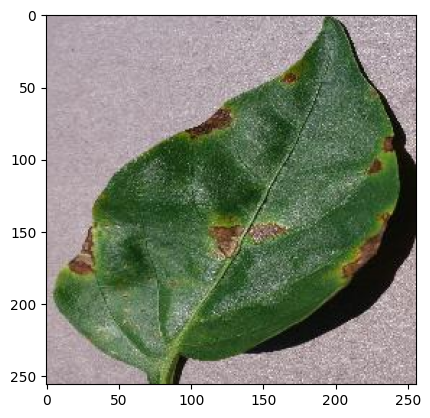

In [ ]:
imagepath = imread("/content/drive/MyDrive/plantdetection/024623ab-be81-4d99-a653-c3be1495ce8e___JR_B.Spot 8889.jpg")
image = imread("/content/drive/MyDrive/plantdetection/024623ab-be81-4d99-a653-c3be1495ce8e___JR_B.Spot 8889.jpg")
image = cv2.resize(image,(256,256))
imagepath = cv2.resize(imagepath,(256,256))
image = np.array(image/255)
image = image.reshape(-1,256,256,3)
plt.imshow(imagepath)

In [ ]:
classification_result = model.predict(image)
print(classification_result)

1/1 [==============================] - 0s 19ms/step
[[1.1496606e-03 9.9858958e-01 1.7305977e-13 1.4258272e-14 3.2021572e-10
  5.4861982e-24 4.2871281e-13 3.4528031e-13 2.0857821e-11 2.6065804e-04
  2.3825158e-14 3.1803241e-10 1.6522084e-16 3.7634917e-09 1.1045185e-18]]


In [ ]:
print(lb.classes_[(classification_result.argmax())])

Pepper__bell___healthy


In [ ]:
y_pred=model.predict(X_test)
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)



36/36 [==============================] - 0s 12ms/step
[[51  5  0  1  1  0  1  0  2  4  2  9  0  0  0]
 [ 1 77  0  0  1  0  0  0  1  0  0  1  0  1  0]
 [ 0  0 82  1  0  0  0  0  0  4  0  1  0  0  2]
 [ 0  0  0 76  2  0  0  0  0  1  1  1  0  1  0]
 [ 0  0  0  0 26  0  0  0  1  0  0  2  0  0  0]
 [ 0  0  0  1  0 65  4  1  0  2  0  3  2  0  0]
 [ 0  0  0  9  0  0 50  0  1  3  2  5  0  0  0]
 [ 2  1  1  5  1  0  2 57  4  7  3  0  0  1  4]
 [ 0  0  0  0  0  0  0  0 54  3  1  0  0  1  3]
 [ 0  0  0  0  0  0  2  0  2 60  1  6  0  4  1]
 [ 0  0  0  0  0  0  0  0  0  1 68  6  0  6  4]
 [ 0  0  0  0  0  0  0  1  0  0  5 45  0  0 23]
 [ 0  0  0  0  0  4  0  0  1  0  2  0 74  1  0]
 [ 0  0  0  0  0  0  0  0  0  3  0  1  0 88  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0 78]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.67      0.78        76
           1       0.93      0.94      0.93        82
           2       0.99      0.91      0.95        90
           3       0.82      0.93      0.87        82
           4       0.84      0.90      0.87        29
           5       0.94      0.83      0.88        78
           6       0.85      0.71      0.78        70
           7       0.97      0.65      0.78        88
           8       0.82      0.87      0.84        62
           9       0.67      0.79      0.73        76
          10       0.80      0.80      0.80        85
          11       0.56      0.61      0.58        74
          12       0.97      0.90      0.94        82
          13       0.85      0.96      0.90        92
          14       0.68      0.99      0.80        79

    accuracy                           0.83      1145
   macro avg       0.84      0.83      0.83      1145
weighted avg       0.85   

# Saving the Model

In [ ]:
converter =  tf.lite.TFLiteConverter.from_keras_model(model)
lite_model = converter.convert()
with open("lenet5.tflite","wb") as f:
  f.write(lite_model)